# 17-CN&S Detección de comunidades


In [1]:
### Importamos bibliotecas
import igraph as ig

In [95]:
### Cargamos red
file_name = "Karate_club_from_gephi.graphml"
g = ig.read(file_name)
print(g.summary())

IGRAPH U-W- 34 78 -- 
+ attr: Authority (v), Betweenness Centrality (v), Closeness Centrality (v), Clustering Coefficient (v), Component ID (v), Degree (v), Eccentricity (v), Eigenvector Centrality (v), Harmonic Closeness Centrality (v), Hub (v), Inferred Class (v), Modularity Class (v), Number of triangles (v), PageRank (v), Weighted Degree (v), b (v), club (v), g (v), id (v), label (v), r (v), size (v), x (v), y (v), Edge Label (e), id (e), weight (e)


In [96]:
### Detección de Comunidades
# https://python.igraph.org/en/stable/api/igraph.community.html?private=1

# Algoritmo de Louvain (Multilevel)

partition = g.community_multilevel(weights=g.es["weight"])
print(partition.summary())

print("Modularidad:", partition.modularity)

Clustering with 34 elements and 4 clusters
Modularidad: 0.4188034188034188


In [97]:
### Tamaños de las comunidades detectadas

print("Tamaños de comunidad:", partition.sizes())

Tamaños de comunidad: [12, 5, 11, 6]


In [98]:
### La función de "subgraphs()" nos genera una lista de objetos grafos de cada
# comunidad detectada

print("Densidad de comunidades")
for subgraph in partition.subgraphs():    
    print("V=",subgraph.vcount(), "\tE=",subgraph.ecount(), 
          "\td=",subgraph.density())
    

Densidad de comunidades
V= 12 	E= 24 	d= 0.36363636363636365
V= 5 	E= 6 	d= 0.6
V= 11 	E= 20 	d= 0.36363636363636365
V= 6 	E= 7 	d= 0.4666666666666667


In [99]:
### El objecto VertexClustering tiene muchos métodos y propiedades útiles.

print("Comunidades más grande")
giant_commty = partition.giant()
print("Vg =",giant_commty.vcount(), "  Eg =", giant_commty.ecount())

Comunidades más grande
Vg = 12   Eg = 24


In [100]:
### Arreglo de pertenencia de cada nodo

print("Vector de pertenencia de cada nodo")
print(partition.membership)
print(len(partition.membership), "=", g.vcount())

Vector de pertenencia de cada nodo
[0, 0, 0, 0, 1, 1, 1, 0, 2, 0, 1, 0, 0, 0, 2, 2, 1, 0, 2, 0, 2, 0, 2, 3, 3, 3, 2, 3, 3, 2, 2, 3, 2, 2]
34 = 34


In [101]:
### Agregar la comunidad como atributo de nodos a la red

g.vs["commty"] = partition.membership
for node in g.vs():
    print("ID Nodo:", node["label"], "\tCommty:", node["commty"])

ID Nodo: 0 	Commty: 0
ID Nodo: 1 	Commty: 0
ID Nodo: 2 	Commty: 0
ID Nodo: 3 	Commty: 0
ID Nodo: 4 	Commty: 1
ID Nodo: 5 	Commty: 1
ID Nodo: 6 	Commty: 1
ID Nodo: 7 	Commty: 0
ID Nodo: 8 	Commty: 2
ID Nodo: 9 	Commty: 0
ID Nodo: 10 	Commty: 1
ID Nodo: 11 	Commty: 0
ID Nodo: 12 	Commty: 0
ID Nodo: 13 	Commty: 0
ID Nodo: 14 	Commty: 2
ID Nodo: 15 	Commty: 2
ID Nodo: 16 	Commty: 1
ID Nodo: 17 	Commty: 0
ID Nodo: 18 	Commty: 2
ID Nodo: 19 	Commty: 0
ID Nodo: 20 	Commty: 2
ID Nodo: 21 	Commty: 0
ID Nodo: 22 	Commty: 2
ID Nodo: 23 	Commty: 3
ID Nodo: 24 	Commty: 3
ID Nodo: 25 	Commty: 3
ID Nodo: 26 	Commty: 2
ID Nodo: 27 	Commty: 3
ID Nodo: 28 	Commty: 3
ID Nodo: 29 	Commty: 2
ID Nodo: 30 	Commty: 2
ID Nodo: 31 	Commty: 3
ID Nodo: 32 	Commty: 2
ID Nodo: 33 	Commty: 2


In [102]:
layout_ = g.layout_lgl()

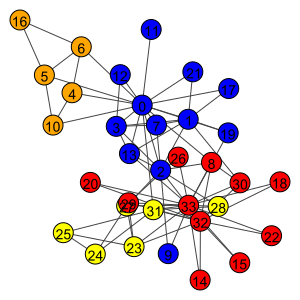

In [103]:
# Dibujar comunidades en igraph

color_dict = {0: "blue", 1: "orange", 2:"red", 3: "yellow"}
visual_style = {}
visual_style["vertex_size"] = 20
visual_style["vertex_color"] = [color_dict[clase] for clase in g.vs["commty"]]
visual_style["vertex_label"] = g.vs["label"]
visual_style["layout"] = layout_
visual_style["bbox"] = (300, 300)
visual_style["margin"] = 20
ig.plot(g, **visual_style)

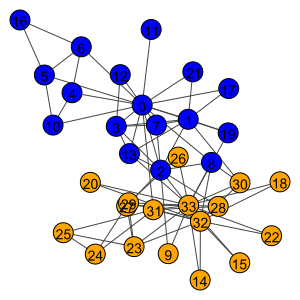

In [104]:
color_dict = {"Mr. Hi": "blue", "Officer": "orange"}
visual_style = {}
visual_style["vertex_size"] = 20
visual_style["vertex_color"] = [color_dict[clase] for clase in g.vs["club"]]
visual_style["vertex_label"] = g.vs["label"]
visual_style["layout"] = layout_
visual_style["bbox"] = (300, 300)
visual_style["margin"] = 20
ig.plot(g, **visual_style)

In [105]:
### Más algoritmos de detección de comunidades
# https://python.igraph.org/en/stable/api/igraph.community.html?private=1

# Edge betweeness
partition = g.community_edge_betweenness(clusters=2, weights=g.es["weight"])
print(type(partition))
print(partition.as_clustering())

<class 'igraph.clustering.VertexDendrogram'>
Clustering with 34 elements and 2 clusters
[0] 0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21
[1] 2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33


In [110]:
# Lable propoagation
partition = g.community_label_propagation()
print(type(partition))
print(partition.summary())
print(partition.modularity)

<class 'igraph.clustering.VertexClustering'>
Clustering with 34 elements and 2 clusters
0.37146614069691


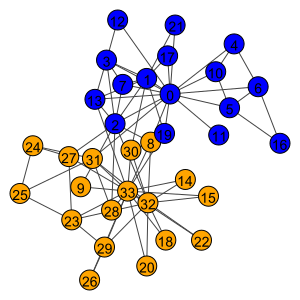

In [111]:
g.vs["commty"] = partition.membership

layout_ = g.layout_lgl()

color_dict = {0: "blue", 1: "orange", 2:"red", 3: "yellow"}
visual_style = {}
visual_style["vertex_size"] = 20
visual_style["vertex_color"] = [color_dict[clase] for clase in g.vs["commty"]]
visual_style["vertex_label"] = g.vs["label"]
visual_style["layout"] = layout_
visual_style["bbox"] = (300, 300)
visual_style["margin"] = 20
ig.plot(g, **visual_style)

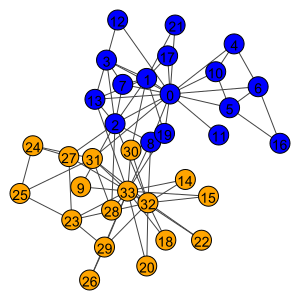

In [112]:
color_dict = {"Mr. Hi": "blue", "Officer": "orange"}
visual_style = {}
visual_style["vertex_size"] = 20
visual_style["vertex_color"] = [color_dict[clase] for clase in g.vs["club"]]
visual_style["vertex_label"] = g.vs["label"]
visual_style["layout"] = layout_
visual_style["bbox"] = (300, 300)
visual_style["margin"] = 20
ig.plot(g, **visual_style)

In [113]:
### Se puede crear una partición dada un atributo

original_partition = ig.VertexClustering.FromAttribute(g, "club")
original_partition.modularity

0.3582347140039448

In [115]:
### Comparar particiones

original_partition.compare_to(partition, method="nmi")

0.837169462877781